In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sp.init_printing()

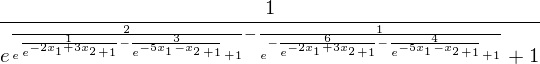

In [15]:
x1,x2 = sp.symbols('x1,x2')
def logistic(x,a=1):
        return 1/(1+sp.exp(-a*x))
    
v11 = logistic(5*x1+x2)
v21 = logistic(2*x1-3*x2)
v12 = logistic(3*v11 - v21)
v22 = logistic(6*v21 + 4*v11)
v31 = logistic(-2*v12 + v22)
sp.simplify(v31)

# Exercise 1.13(b)

In [17]:
def sigmoid_func_linear_approximation(x):
    a = 0.5
    return a*x+0.5

v11 = sigmoid_func_linear_approximation(5*x1+x2)
v21 = sigmoid_func_linear_approximation(2*x1-3*x2)
v12 = sigmoid_func_linear_approximation(3*v11 - v21)
v22 = sigmoid_func_linear_approximation(6*v21 + 4*v11)
v31 = sigmoid_func_linear_approximation(-2*v12 + v22)
v31 = sp.simplify(v31)
v31

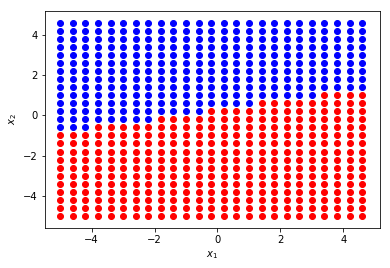

In [18]:
input_values = np.arange(-5,5,0.4)
for i in input_values:
    for j in input_values:
        result = v31.subs({x1:i,x2:j}).evalf()
        if result > 0:
            plt.scatter(i,j,color='r')
        else:
            plt.scatter(i,j,color='b')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Validation of perception learning algorithm

In [3]:
w = np.array([1,0,0])

C1 = [[-0.5,1],[1.5,-1],[0.5,-1]]
C2 = [[-1.5,-2],[-1.5,1],[0.5,-2]]
learning_rate = 1

C1_ = C1[:]
C2_ = C2[:]

for point in (C1):
    i = C1.index(point)
    C1_.append(C1[i])
    C1[i] = [1]+ point 
for point in (C2):
    j = C2.index(point)
    C2_.append(C2[j])
    C2[j] = [1]+ point 
    temp = C2[j]
    C2[j] = [x * -1 for x in temp]

adjusted_patterns = C1 + C2

def weight_adjust(w_n,x_n,learning_rate):
    y = np.dot(w_n,x_n)
    
    if y<=0:
        return w_n + (learning_rate*x_n)
    else:
        return w_n

_count = 0
w_old = w

while(True):   
    if _count > 2:
        break
    for pattern in adjusted_patterns:
        w_new = weight_adjust(w,pattern,learning_rate)
        w = w_new
   
    if w.all() == w_old.all():
        _count+=1
    else:
        w_old = w
        
print "Final weight=",w 
print "Bias = ",w[0]

Final weight= [ 1.  3.  2.]
Bias =  1.0


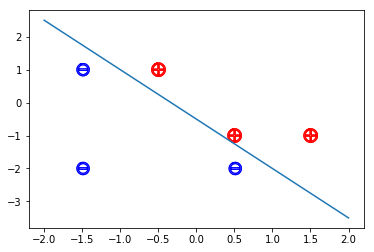

In [4]:
for point1 in (C1_): 
    plt.scatter(point1[0],point1[1], color= 'red',
                s=200, facecolors='none',
                marker='$\\bigoplus$')
for point2 in (C2_): 
    plt.scatter(point2[0],point2[1], color= 'blue',
                s=200, facecolors='none',
                marker='$\\ominus$')    

x1 = np.linspace(-2.0, 2.0, num=10)
x2 =  (-w[0]+(-w[1]*x1))/(w[2])
plt.plot(x1,x2)